### Michał Wiśniewski 418486

**Problem 5c (Chi-square independence test).** 
You are given the results of IPSOS exit polls for 2015 parliamentary elections in Poland in table **data**. Decide if we can assume that gender has no effect on voting preferences. To this end:
 * Compute row totals $r_i$, column totals $c_j$, and overall total $N$.
 * If the variables are independent, we expect to see $f_{ij} = r_i c_j / N$ in $i$-th row $j$-th column.
 * Compute the test statistic as before, i.e. $$ S = \sum_{ij} \frac{\left(f_{ij}-X_{ij}\right)^2}{f_{ij}}.$$
 * Again test vs $\chi^2$ CDF. However, if the variables are independent, we only have $(r-1)(c-1)$ degrees of freedom here (we only need to know the row and column totals).
 * One obvious offender is the KORWiN party, try removing the last column and repeating the experiment.
 
**Note:** This kind of data is (to the best of our knowledge) not available online. It has been recreated based on
online infographics and other tidbits of information available online. It is definitely not completely accurate, hopefully it is not very far off. Moreover, exit polls do not necessary reflect the actual distribution of the population.

In [195]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
%matplotlib inline

# Rows: women, men
# Columns: PiS, PO, Kukiz, Nowoczesna, Lewica, PSL, Razem, KORWiN
#data = np.array([ [39.7,26.4,7.5,7.1,6.6,5.0,4.2,2.8], 
#                  [38.5,20.3,10.6,7.1,6.6,5.4,3.5,7.1]])
data = np.array([[ 17508, 11642,  3308,  3131,  2911,  2205,  1852, 1235],
 [ 17672,  9318,  4865,  3259,  3029,  2479,  1606, 3259]])

# Lekko zmienione dane tak jak w notebooku z rozwiązaniami
data = data // 50
data

array([[350, 232,  66,  62,  58,  44,  37,  24],
       [353, 186,  97,  65,  60,  49,  32,  65]])

$H_0$ - są niezależne od płci  
$H_1$ - nie są

## Poniżej wybór, czy bierzemy partie Korwin czy nie (najpierw należy wczytać poprzednią komórkę)

In [196]:
czyBracKorwin = True
if not czyBracKorwin:
    data = data[:, :-1]

In [197]:
threshold = 0.05
rows = data.shape[0]
cols = data.shape[1]
print(rows, cols)

2 8


In [198]:
rows_sum = []
columns_sum = []

for row_i in range(data.shape[0]):
    rows_sum.append(np.sum(data[row_i]))
    
for column_i in range(data.shape[1]):
    columns_sum.append(np.sum(data[:,column_i]))    
    
all_sum = np.sum(data)

print(rows_sum, columns_sum, all_sum)

[873, 907] [703, 418, 163, 127, 118, 93, 69, 89] 1780


In [199]:
calc_data = []
for row_i in range(data.shape[0]):
    calc_data.append([])
    for col_i in range(data.shape[1]):
        calc_data[row_i].append(rows_sum[row_i] * columns_sum[col_i] / all_sum)
calc_data

[[344.7859550561798,
  205.00786516853933,
  79.9432584269663,
  62.28707865168539,
  57.87303370786517,
  45.61179775280899,
  33.84101123595506,
  43.65],
 [358.2140449438202,
  212.99213483146067,
  83.0567415730337,
  64.71292134831461,
  60.12696629213483,
  47.38820224719101,
  35.15898876404494,
  45.35]]

In [200]:
S = 0
for row in range(data.shape[0]):
    for col in range(data.shape[1]):
        S += ((data[row][col] - calc_data[row][col])**2)/calc_data[row][col]
        
print(S)

29.95574093288753


In [201]:
critical_value = chi2.ppf(1-threshold, (cols-1)*(rows-1))
critical_value

14.067140449340169

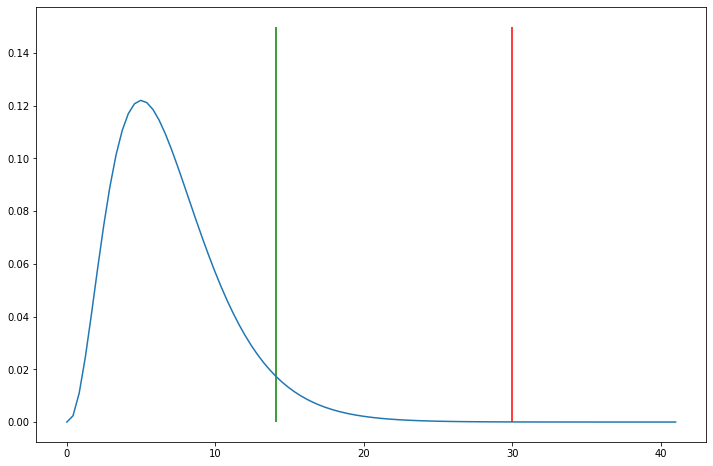

In [202]:
plt.figure(figsize=(12,8))
plt.vlines([S, critical_value], ymin=0, ymax=0.15, colors=['r', 'g'], label=['aa', 'bb'])
plt.plot(np.linspace(0, 41, num=100), chi2.pdf(np.linspace(0, 41, num=100), df=(rows-1)*(cols-1)))

# Zielona linia - wartość krytyczna, czerwona linia - S

In [203]:
pvalue = 1 - chi2.cdf(S, df=(cols-1)*(rows-1))
pvalue

9.675122668517666e-05

In [204]:
print('(Na podstawie wartości krytycznej) Czy bierzemy H0?:', S <= critical_value)

(Na podstawie wartości krytycznej) Czy bierzemy H0?: False


In [205]:
print('(Na podstawie p-value) Czy bierzemy H0?:', pvalue > threshold)

(Na podstawie p-value) Czy bierzemy H0?: False


In [206]:
print('S statistic value:', S, 'p-value:', pvalue, 'threshold', threshold, 'Accept H0?:', S <= critical_value)

S statistic value: 29.95574093288753 p-value: 9.675122668517666e-05 threshold 0.05 Accept H0?: False
